# Analysing Sea Surface Temperature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/curated_data.csv')
data['date_object'] = pd.to_datetime(data['date_object'])
data = (data.drop(columns=['Unnamed: 0'])).sort_values(by='date_object', ascending=True)

data.shape

(15556, 6)

In [3]:
data.head()

,date_object,mean_temp,var_temp,stdv_temp,min_temp,max_temp
2741,1981-08-25,296.037538,6.800931,2.607860,287.59000,301.97000
2736,1981-08-26,296.021401,6.515159,2.552481,287.72998,301.91998
2738,1981-08-27,295.950217,6.202047,2.490391,287.80000,301.38000
2735,1981-08-28,296.045160,6.338932,2.517724,287.75998,301.53000
2740,1981-08-29,296.034722,5.792664,2.406795,287.78998,301.60000


## Exploratory Data Analysis

Analyzing the yearly mean sea surface temperature shows that the temperature has been rising since past four decades

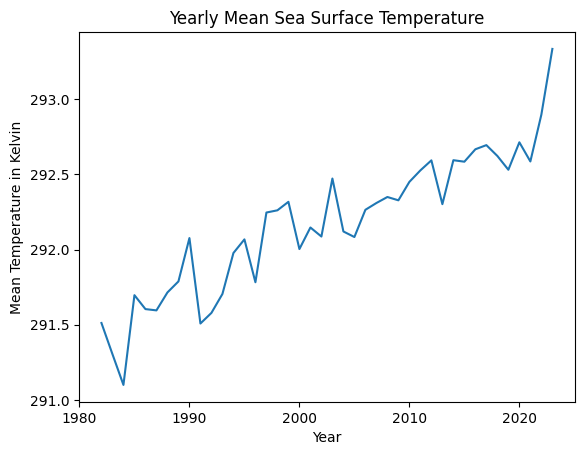

In [4]:
tmp_df = data.copy()
tmp_df['Year'] = tmp_df['date_object'].dt.year  
tmp_df = tmp_df[~tmp_df['Year'].isin([1981, 2024])]
tmp_df = tmp_df.groupby('Year')['mean_temp'].mean().reset_index()
plt.plot(tmp_df['Year'], tmp_df['mean_temp'])
plt.title(f'Yearly Mean Sea Surface Temperature')
plt.xlabel('Year')
plt.ylabel('Mean Temperature in Kelvin')
plt.grid(False)
plt.show()

The below code shows the distribution of mean sea surface temperature throughout the year. From the drop down menu we can select a specific year to analyze it.

The general pattern shows that the temperature rises from May to September and then starts decreasing up till March.

The year of 1981 and 2024 is exception in the below plot as we do not have full 12 months of data for both of them 

In [5]:
from ipywidgets import interact, widgets

def plot_year_data(year):
    selected_data = data[data['date_object'].dt.year == year].sort_values(by='date_object', ascending=True)
    plt.figure(figsize=(15, 8))
    viz_cols = ['mean_temp', 'max_temp', 'min_temp']
    for column in viz_cols:
        plt.plot(selected_data['date_object'], selected_data[column], label=column)
    
    plt.title(f'Data for Year {year}')
    plt.xlabel('Year')
    plt.ylabel('Temperature in Kelvin')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

unique_years = data['date_object'].dt.year.unique()
unique_years.sort()
year_selector = widgets.Dropdown(options=unique_years, description='Year:')

interact(plot_year_data, year=year_selector)

interactive(children=(Dropdown(description='Year:', options=(1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1…

<function __main__.plot_year_data(year)>

The below block examines the variance and standard deviation in the daily average sea surface temperature. As the sea surface temperature starts to rise from the month of May, we see a high variance in the temperature

In [6]:
def plot_var_data(year):
    selected_data = data[data['date_object'].dt.year == year].sort_values(by='date_object', ascending=True)
    plt.figure(figsize=(15, 8))
    viz_cols = ['var_temp', 'stdv_temp']
    for column in viz_cols:
        plt.plot(selected_data['date_object'], selected_data[column], label=column)
    
    plt.title(f'Data for Year {year}')
    plt.xlabel('Year')
    plt.ylabel('Temperature in Kelvin')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()
    
var_year_selector = widgets.Dropdown(options=unique_years, description='Year:')
interact(plot_var_data, year=var_year_selector)

interactive(children=(Dropdown(description='Year:', options=(1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1…

<function __main__.plot_var_data(year)>

The below code shows the distribution of daily mean sea surface temperature month wise for different year. From the drop down menu we can select a specific month to analyze the distribution.

Each point is the mean sea surface temperature on a day in the selected month. The longer lines show that there was more variations in that particular month.

The year 2014 seems to show the highest variation in the data.

The year of 1981 and 2024 is exception in the below plot as we do not have full 12 months of data for both of them 

In [7]:
def plot_month_data(month):
    selected_data = data[data['date_object'].dt.month == month].sort_values(by='date_object', ascending=True)
    plt.figure(figsize=(15, 8))
    plt.scatter(selected_data['date_object'], selected_data['mean_temp'], label='mean_temp')
    plt.scatter(selected_data['date_object'], selected_data['min_temp'], label='min_temp')
    plt.scatter(selected_data['date_object'], selected_data['max_temp'], label='max_temp')
    
    plt.title(f'Data for Month {month}')
    plt.xlabel('Year')
    plt.ylabel('Temperature in Kelvin')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

months = data['date_object'].dt.month.unique()
months.sort()
month_selector = widgets.Dropdown(options=months, description='Month:')

interact(plot_month_data, month=month_selector)

interactive(children=(Dropdown(description='Month:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1)…

<function __main__.plot_month_data(month)>

The below code gives an interactive layout to see the distribution of different variables in a given year

In [8]:
from ipywidgets import interact, widgets

def plot_data(year, viz_cols):
    selected_data = data[data['date_object'].dt.year == year].sort_values(by='date_object', ascending=True)
    plt.figure(figsize=(15, 8))
    for column in viz_cols:
        plt.plot(selected_data['date_object'], selected_data[column], label=column)
    
    plt.title(f'Data for Year {year}')
    plt.xlabel('Year')
    plt.ylabel('Temperature in Kelvin')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

unique_years = data['date_object'].dt.year.unique()
unique_years.sort()
all_year_selector = widgets.Dropdown(options=unique_years, description='Year:')
all_viz_cols_selector = widgets.SelectMultiple(options=data.columns[1:], value=[data.columns[1]], description='Columns:')

interact(plot_data, year=all_year_selector, viz_cols=all_viz_cols_selector)

interactive(children=(Dropdown(description='Year:', options=(1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1…

<function __main__.plot_data(year, viz_cols)>

## Preparing Data For Model

In the below code we are selecting the last one year as the test dataset and will be using rest of the data for training our model.

We also preprocess the data using scikit-learn's min_max scaler function to normalize the data that we pass on to the model. 

We will be passing the data in the set of 30 which means that the model will predict the mean, variance, standard deviation, minimum and maximum sea temperature given the data of past 30 days.

In [9]:
from sklearn.preprocessing import MinMaxScaler

df = data.sort_values(by='date_object', ascending=True)
df.drop(columns=['date_object'], inplace=True)

train = df.iloc[:-365]  
test = df.iloc[-365:]   

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps)])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 30
X_train, y_train = prepare_data(train_scaled, n_steps)
X_test, y_test = prepare_data(test_scaled, n_steps)


## Model

In [10]:
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=300, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(units=200, activation='relu', return_sequences=True))
model.add(LSTM(units=100, activation='relu'))
model.add(Dense(units=train.shape[1]))
model.compile(optimizer='adam', loss='mse')

model.summary()

/Users/ayush/miniconda3/envs/umd/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 300)        │       367,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 200)        │       400,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │       120,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 888,905 (3.39 MB)

 Trainable params: 888,905 (3.39 MB)

 Non-trainable params: 0 (0.00 B)

## Training

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
474/474 ━━━━━━━━━━━━━━━━━━━━ 54s 109ms/step - loss: 0.0186
Epoch 2/10
474/474 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - loss: 0.0018
Epoch 3/10
474/474 ━━━━━━━━━━━━━━━━━━━━ 60s 126ms/step - loss: 0.0012
Epoch 4/10
474/474 ━━━━━━━━━━━━━━━━━━━━ 52s 110ms/step - loss: 9.6469e-04
Epoch 5/10
474/474 ━━━━━━━━━━━━━━━━━━━━ 58s 123ms/step - loss: 8.6588e-04
Epoch 6/10
474/474 ━━━━━━━━━━━━━━━━━━━━ 55s 115ms/step - loss: 7.6356e-04
Epoch 7/10
474/474 ━━━━━━━━━━━━━━━━━━━━ 59s 125ms/step - loss: 7.7588e-04
Epoch 8/10
474/474 ━━━━━━━━━━━━━━━━━━━━ 56s 118ms/step - loss: 7.2939e-04
Epoch 9/10
474/474 ━━━━━━━━━━━━━━━━━━━━ 54s 113ms/step - loss: 7.0028e-04
Epoch 10/10
474/474 ━━━━━━━━━━━━━━━━━━━━ 60s 126ms/step - loss: 7.2113e-04


## Testing

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
Mean Absolute Error (MAE): 0.02012221913849322
Mean Squared Error (MSE): 0.0007835409785888243
Root Mean Squared Error (RMSE): 0.027991801988954273


In [13]:
forecast = scaler.inverse_transform(predictions)
new_df = pd.DataFrame(forecast, columns=['mean_temp','var_temp','stdv_temp','min_temp','max_temp'])
new_df.index = range(30, 365)
new_df.head()

,mean_temp,var_temp,stdv_temp,min_temp,max_temp
30,290.921051,3.214123,1.808793,286.020325,297.146271
31,291.034851,3.129500,1.784996,286.027649,297.122162
32,290.974823,2.984802,1.766817,284.957672,296.950409
33,291.129333,2.776916,1.696540,286.129028,296.666687
34,291.224854,2.838867,1.701811,286.097137,296.733063


In [14]:
test_2 = test.reset_index().drop(columns=['index'])

/var/folders/zn/86b3s_n52w30xs88c6hy01r00000gn/T/ipykernel_5893/3216913931.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(label)
/var/folders/zn/86b3s_n52w30xs88c6hy01r00000gn/T/ipykernel_5893/3216913931.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(label)
/var/folders/zn/86b3s_n52w30xs88c6hy01r00000gn/T/ipykernel_5893/3216913931.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(label)
/var/folders/zn/86b3s_n52w30xs88c6hy01r00000gn/T/ipykernel_5893/3216913931.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(label)
/var/folders/zn/86b3s_n52w30xs88c6hy

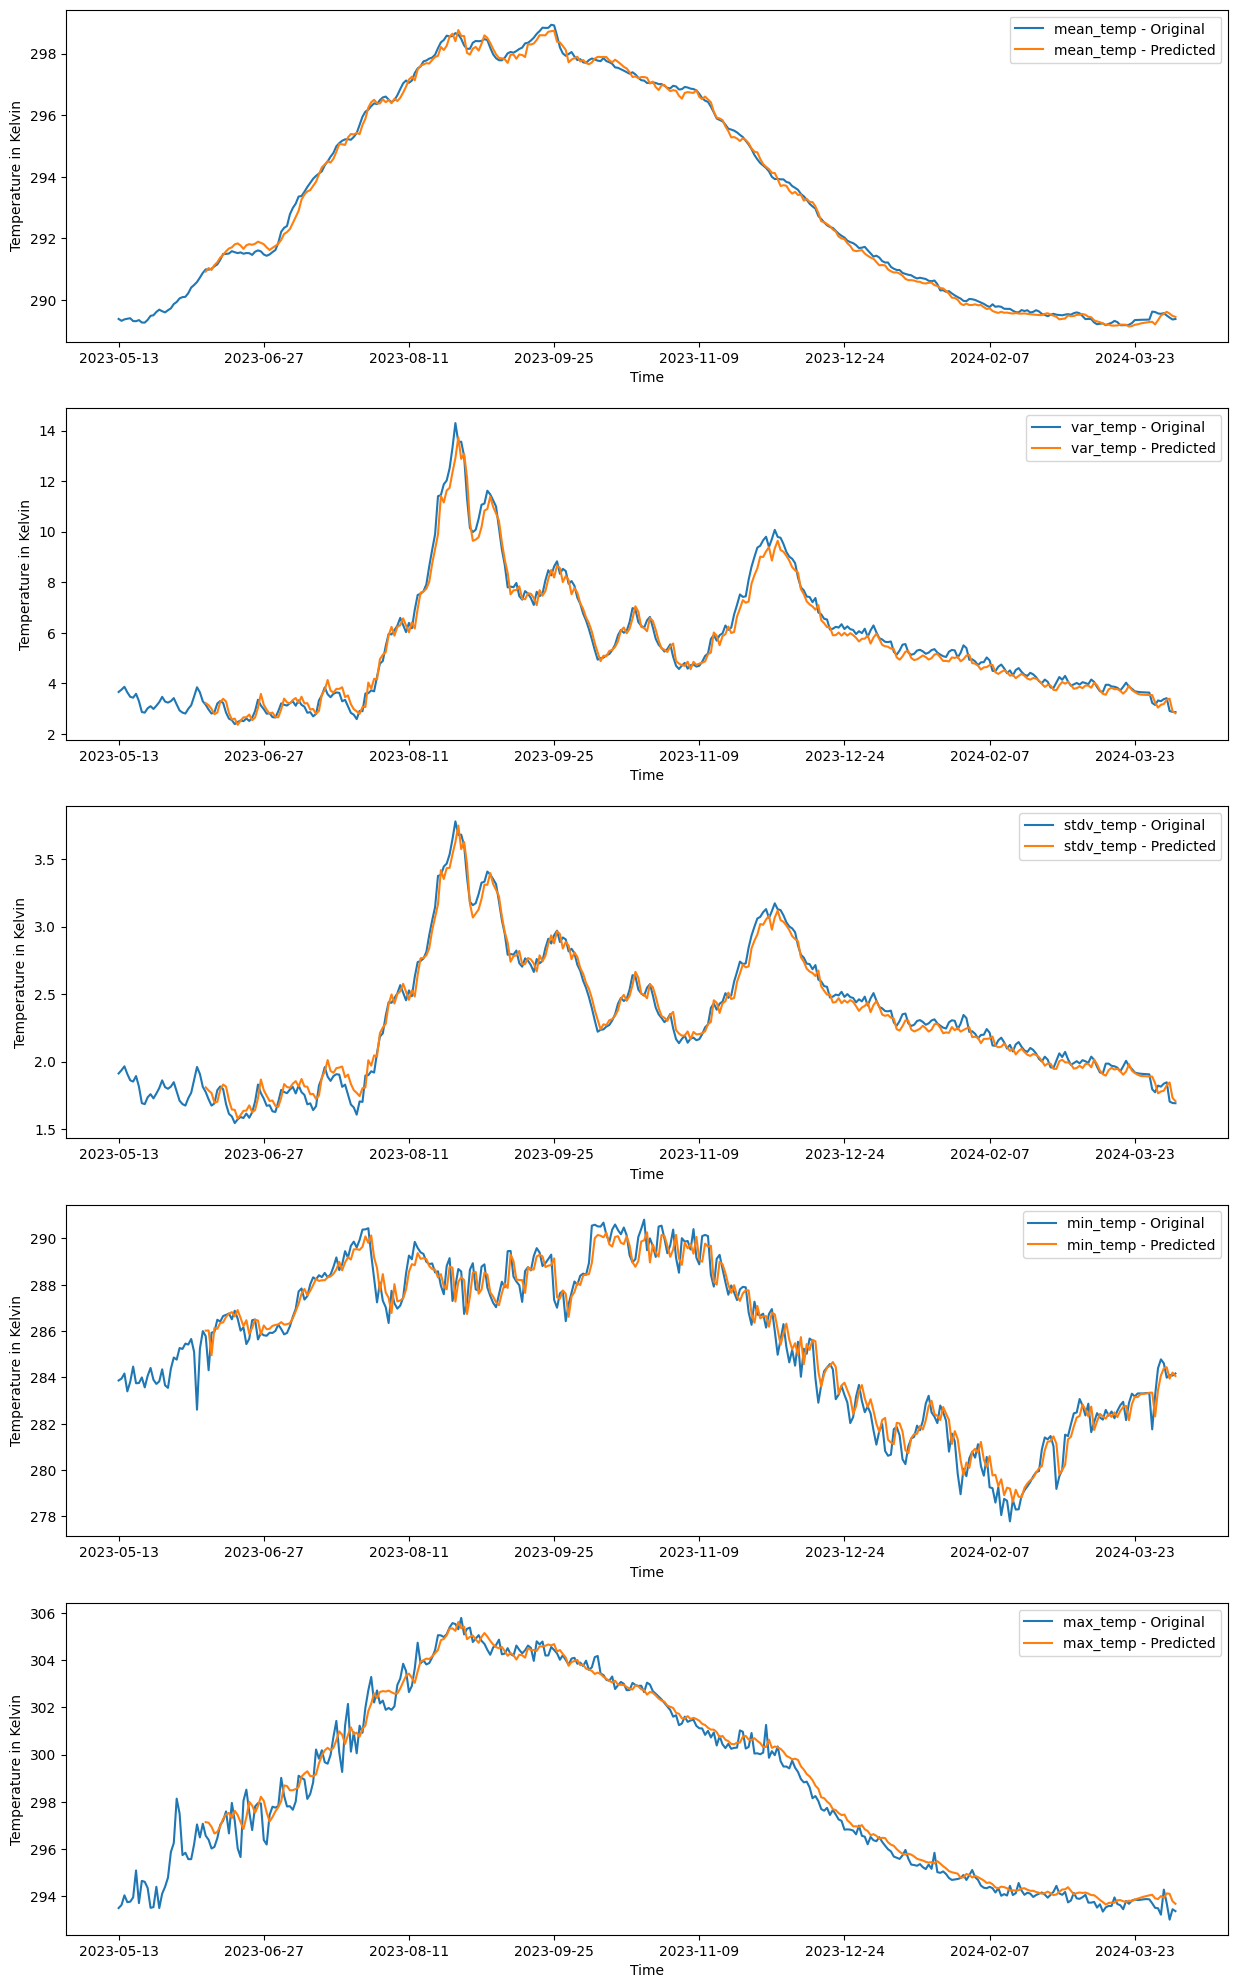

In [15]:
fig, axs = plt.subplots(5, 1, figsize=(15,25))

label = data.sort_values(by='date_object', ascending=True)[-365:]['date_object'].dt.date.to_list()
label = [label[x] for x in range(len(label)) if (x%45)==0]
for i, cols in enumerate(test_2.columns):
    axs[i].plot(test_2[cols], label=f'{cols} - Original')
    axs[i].plot(new_df[cols], label=f'{cols} - Predicted')
    axs[i].set_xticklabels(label)
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Temperature in Kelvin')
    axs[i].legend()

plt.show()

## Forecasting for April 2024 to June 2024

In [16]:
predicted_values = []
input_data = test.iloc[335:]

forecast_scaled = scaler.transform(input_data)
input = forecast_scaled.reshape(1, forecast_scaled.shape[0], forecast_scaled.shape[1])

for _ in range(90):
    next_value = model.predict(input)
    predicted_values.append(next_value[0])
    input = np.concatenate((input[:, 1:, :], next_value.reshape(1, 1, -1)), axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

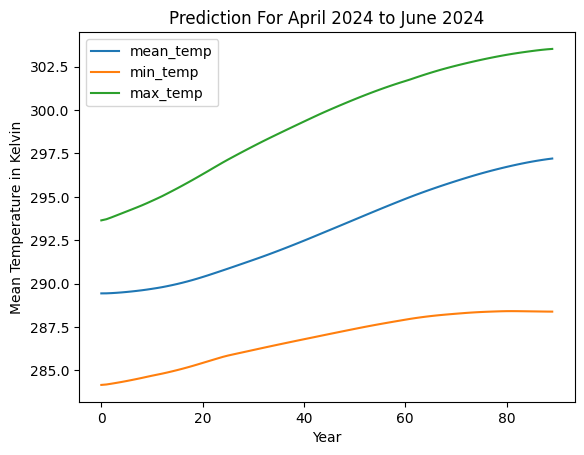

In [17]:
forecast_df = scaler.inverse_transform(predicted_values)
forecast_df = pd.DataFrame(forecast_df, columns=['mean_temp','var_temp','stdv_temp','min_temp','max_temp'])


#fig, axs = plt.subplots(5, 1, figsize=(15,25))

plt.plot(forecast_df[['mean_temp', 'min_temp', 'max_temp']], 
         label= ['mean_temp', 'min_temp', 'max_temp'])

plt.title(f'Prediction For April 2024 to June 2024')
plt.xlabel('Year')
plt.ylabel('Mean Temperature in Kelvin')
plt.grid(False)
plt.legend()
plt.show()